In [1]:
%load_ext autoreload

import time

import struct
import array
import gc

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append("../mim_data_utils/src")
from mim_data_utils import DataLogger, DataReader

np.set_printoptions(suppress=True, precision=2)
from scipy.spatial.transform import Rotation

In [2]:
# reader = DataReader('2021-06-30_17-13-43.mds')
# reader = DataReader('good data/2021-06-30_17-11-17.mds')
reader = DataReader('num=100.mds')

Text(0.5, 1.0, 'upper and lower leg starting/zero pos')

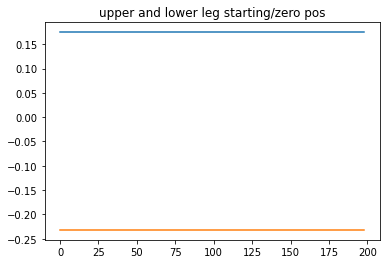

In [3]:
plt.plot(reader.data['zero_pos'][:,4:6])
plt.title('upper and lower leg starting/zero pos')

Text(0.5, 1.0, 'invert/flip')

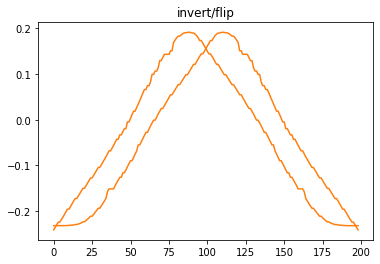

In [4]:
plt.plot(reader.data['joint_positions'][:,5],color='C1')
plt.plot(reader.data['joint_positions'][::-1,5], color='C1')
plt.title('invert/flip')

In [5]:
# account for initial/zero positions and hip/upper leg moving
j = reader.data['joint_positions'][:,4:6] - reader.data['zero_pos'][:,4:6]
j = j[:,1] + j[:,0]
j.shape

(199,)

Text(0.5, 1.0, 'upper and lower legs normalized with zero pos')

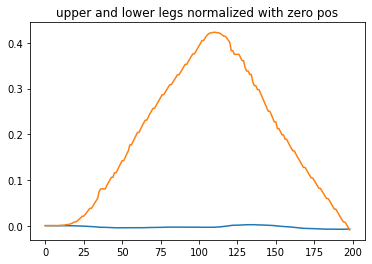

In [6]:
plt.plot(reader.data['joint_positions'][:,4:6] - reader.data['zero_pos'][:,4:6])
plt.title('upper and lower legs normalized with zero pos')

Text(0.5, 1.0, 'invert/flip')

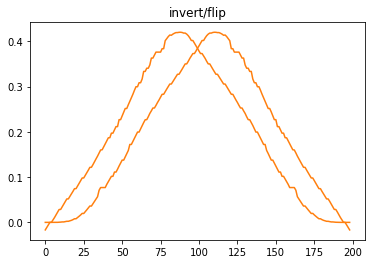

In [7]:
plt.plot(j, color='C1')
plt.plot(j[::-1], color='C1')
plt.title('invert/flip')  # see how close starting and ending positions are

Text(0.5, 1.0, 'vicon quaternion data')

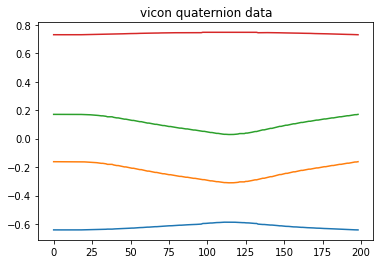

In [8]:
plt.plot(reader.data['vicon_leg_hl'][:,3:7])
plt.title('vicon quaternion data')

In [9]:
# scalar comes last
Rotation.from_quat((0,0,0,1)).as_euler('xyz')

array([0., 0., 0.])

Text(0.5, 1.0, 'vicon quaternion converted to euler angles')

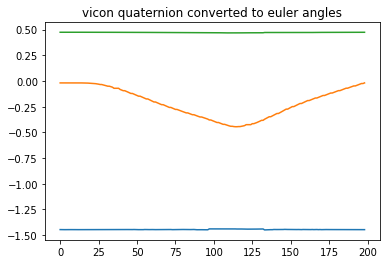

In [10]:
E_all = Rotation.from_quat(reader.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')
plt.plot(E_all)
plt.title('vicon quaternion converted to euler angles')

Text(0.5, 1.0, 'invert/flip')

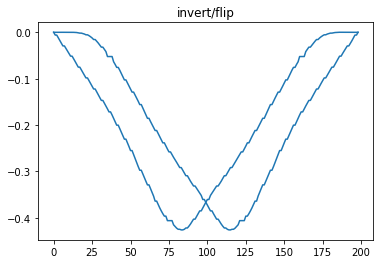

In [11]:
E = Rotation.from_quat(reader.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')[:,1]
E -= E[0]
plt.plot(E)
plt.plot(E[::-1], color='C0')
plt.title('invert/flip')  # see how close starting and ending positions are 

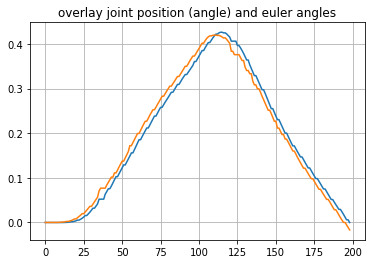

In [12]:
plt.plot(E*-1)
plt.plot(j)
plt.title('overlay joint position (angle) and euler angles')
plt.grid()

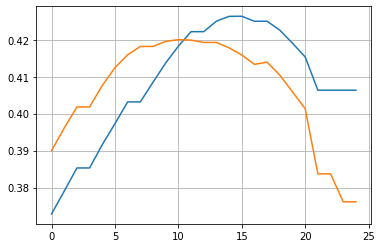

In [13]:
_m = np.argmax(j)
s = slice(_m-10,_m+15)

plt.plot(E[s]*-1)
plt.plot(j[s])
plt.grid()

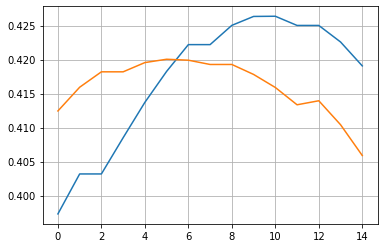

In [14]:
_m = np.argmax(j)
s = slice(_m-5,_m+10)
plt.plot(E[s]*-1)
plt.plot(j[s])
plt.grid()

In [15]:
D = (j+E)

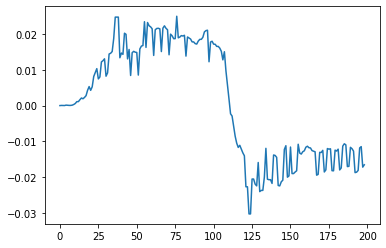

In [16]:
plt.plot(D)

# All Plots

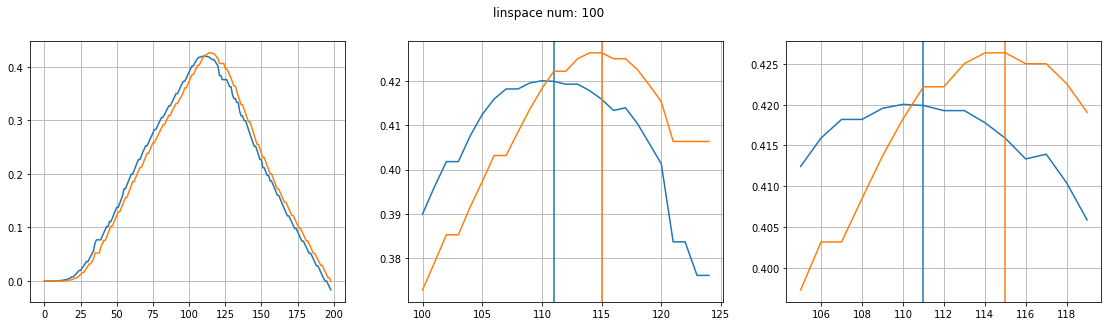

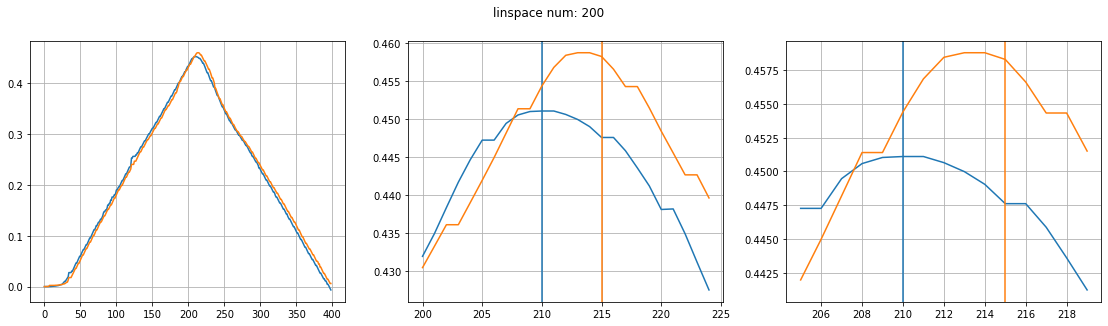

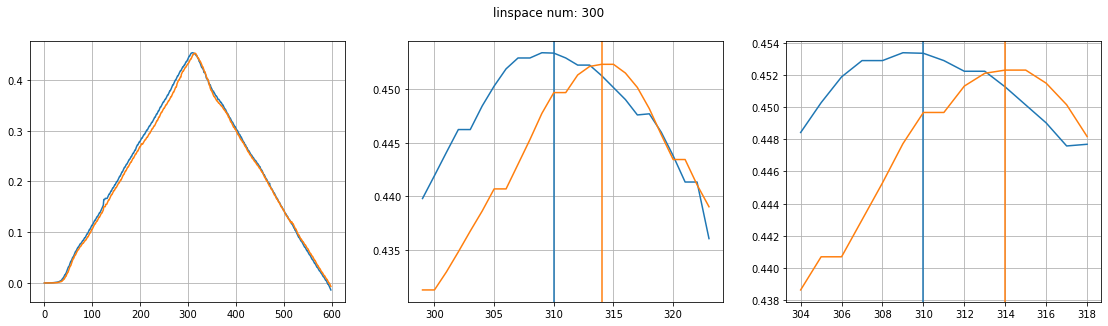

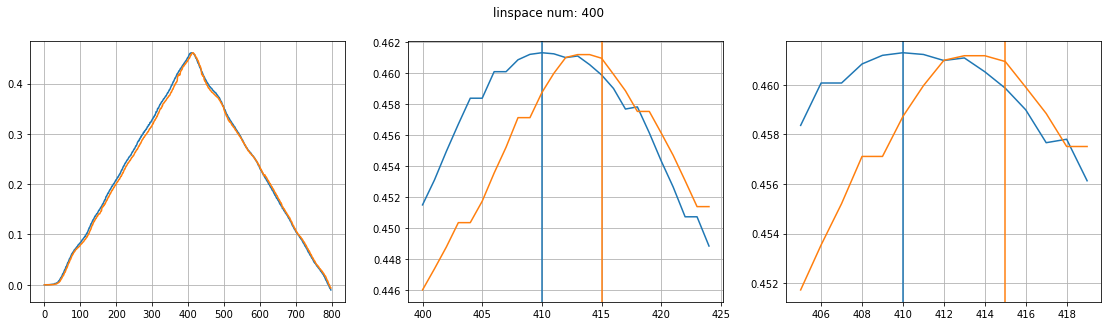

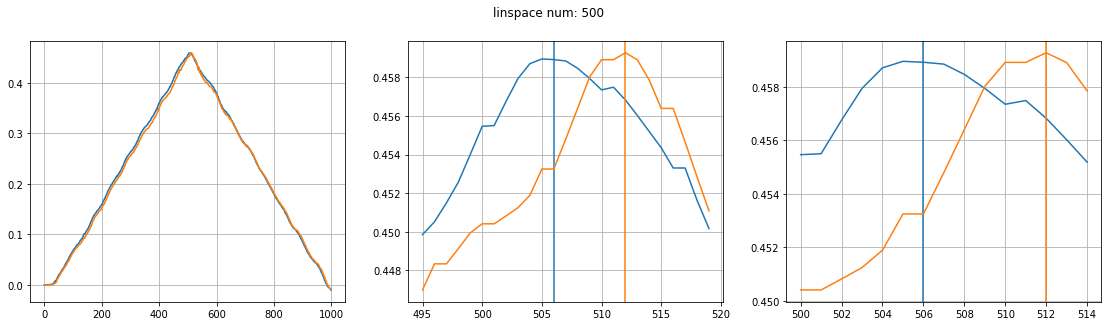

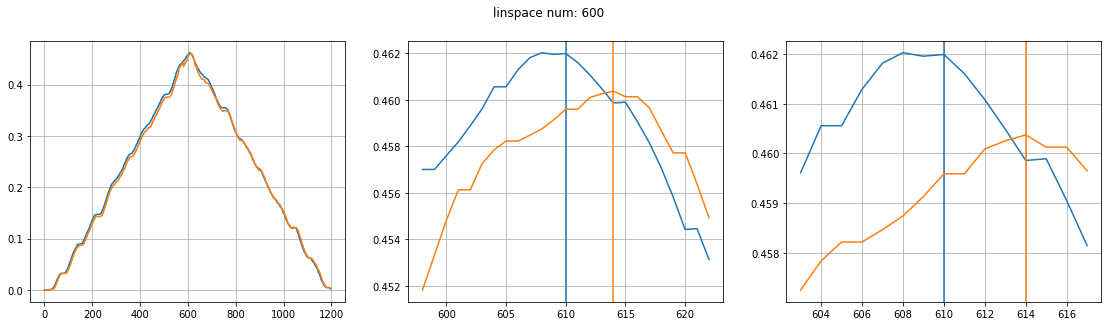

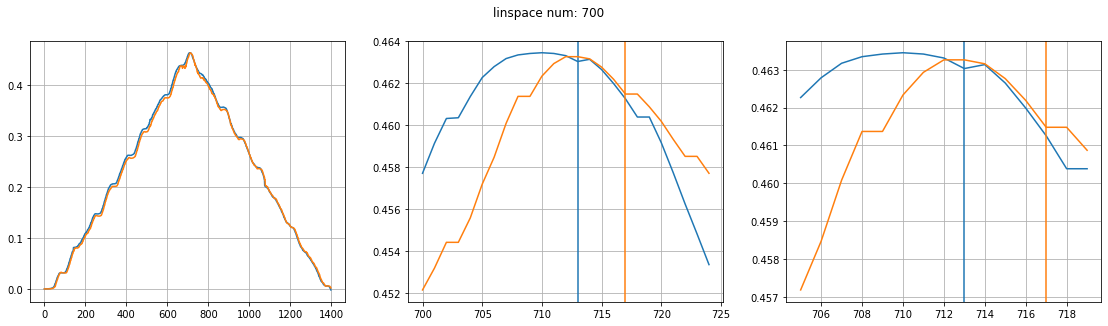

In [82]:
V = [  # Vertical line location
    (111, 115),
    (210, 215),
    (310, 314),
    (410, 415),
    (506, 512),
    (610, 614),
    (713, 717),
]
for i in range(1, 7+1):
    r = DataReader(f'num={i*100}.mds')
    j = r.data['joint_positions'][:,4:6] - r.data['zero_pos'][:,4:6]
    j = j[:,1] + j[:,0]
    e = Rotation.from_quat(r.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')[:,1]
    e -= e[0]
    e *= -1
    
    # horizontal subplots
    fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(19.2,4.8))  # triple width
    fig.suptitle(f'linspace num: {i*100}')
    
    m = np.argmax(j)
    
    f1.plot(j, label='joint')
    f1.plot(e, label='vicon')
    f1.grid()
    
    s = slice(m-10,m+15)
    f2.plot(np.arange(s.start, s.stop), j[s])
    f2.axvline(x=V[i-1][0], color='C0')
    f2.plot(np.arange(s.start, s.stop), e[s])
    f2.axvline(x=V[i-1][1], color='C1')
    f2.grid()
    
    s = slice(m-5,m+10) 
    f3.plot(np.arange(s.start, s.stop), j[s])
    f3.axvline(x=V[i-1][0], color='C0')
    f3.plot(np.arange(s.start, s.stop), e[s])
    f3.axvline(x=V[i-1][1], color='C1')
    f3.grid()
    
    plt.show()